# Task_2 : Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Internship Projects/Prodigy Tasks/Task 2/Mall_Customers.csv')

## Display the first few rows of the dataset

In [4]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Drop unnecessary columns (e.g., CustomerID and Gender)

In [5]:
data = df.drop(['CustomerID', 'Gender'], axis=1)

## Check for missing values

In [6]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Feature scaling

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## Elbow method to determine the optimal number of clusters

In [8]:
inertia = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

## Plot the elbow method graph

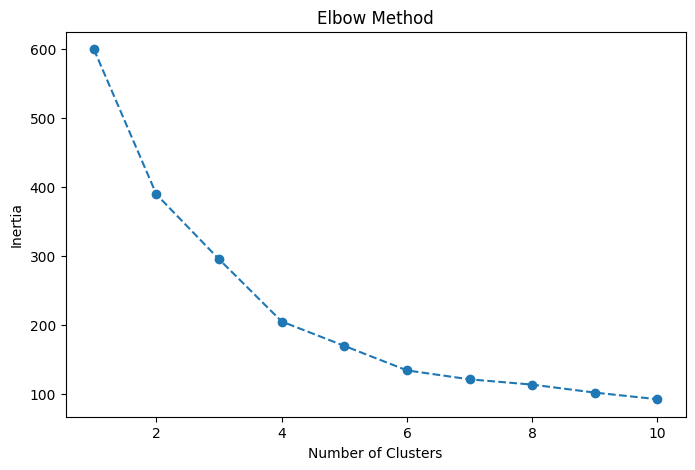

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Optimal number of clusters (based on the elbow method)

In [10]:
optimal_clusters = 5  # Update based on the elbow graph

## Apply K-means clustering

In [11]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

## Visualize the clusters (using Annual Income and Spending Score)

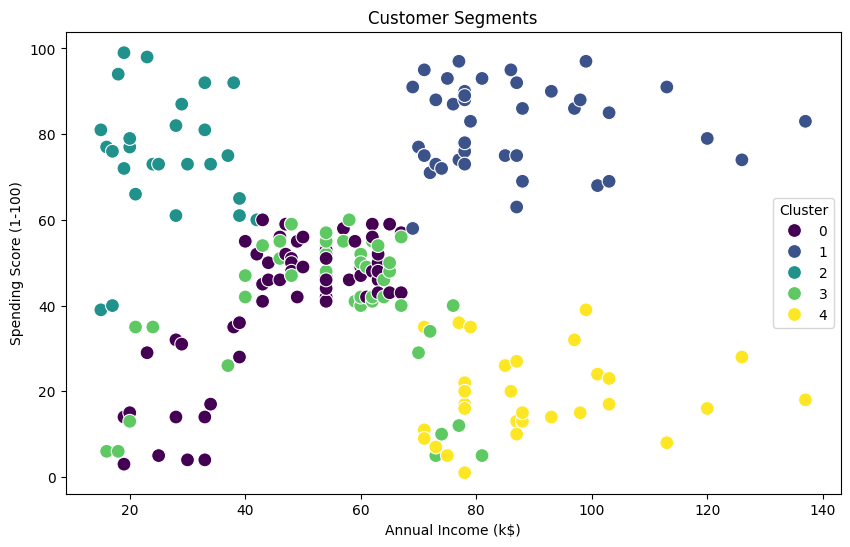

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'],
                hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

## Save the clustered data to a new CSV file

In [13]:
output_file = "Customer_Segments_Clustered.csv"
data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")

Clustered data saved to Customer_Segments_Clustered.csv
